Resources

Coursera tutorials:

Ridge: https://www.coursera.org/learn/ml-regression/lecture/1F5pH/visualizing-the-ridge-solution

LASSO (Least Absolute Shrinkage and Selection Operator): https://www.coursera.org/learn/ml-regression/lecture/VZlmt/visualizing-the-lasso-cost-and-solution


CS189 notes on Bias, Variance: http://www.eecs189.org/static/notes/n5.pdf



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
n_samples = 200
n_features = 50
A = np.round(np.random.rand(n_samples, n_features),3)
X = np.array(np.arange(n_samples))

for i in range(n_features):
    A[:,i] += X
    
A[:,-1] += np.round(np.random.rand(n_samples) * 100,3)

In [3]:
# Randomly created data label
label = np.random.rand(n_samples)*50

In [4]:
label

array([37.66653959, 23.74497704, 19.04699493, 31.46884278,  4.50710589,
       28.92892836, 20.38486728, 16.27345045, 13.67293807,  5.83699474,
       42.92134384, 15.22122566,  2.89085327, 27.18687767, 21.32870853,
       46.02647396,  4.71272095, 13.02388497, 27.14277089, 45.62571686,
       28.87189916, 15.04885273, 27.9247236 , 43.30556482, 26.00278347,
       37.66414998, 18.45829057,  7.46564547,  3.45694238, 21.95429027,
       12.71658609, 15.15237958, 44.47170319,  9.76253137, 15.46882003,
       39.04811861,  5.46564985, 12.3990264 , 20.60436635, 45.23972899,
       31.2913944 , 22.61667659, 49.0278489 , 13.89067169, 39.84591762,
       18.60788135, 42.0154743 , 43.48120745, 23.01239188, 29.98665163,
       46.99714134, 47.15292343, 45.37938138, 41.03969342, 25.67791697,
        0.13676032, 32.55432403, 32.830131  , 30.05692484,  0.63145991,
        1.92970527,  0.83219173, 28.81979262, 29.76204392, 24.88517949,
       35.71827715, 46.43706564, 43.01971844, 42.46324984, 36.03

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(A, label, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 50), (40, 50), (160,), (40,))

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error as mse

In [7]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression_predictions = linear_regression.predict(X_test)
print("mean_squared_error for linear regression: " + str(mse(linear_regression_predictions, y_test)))

linear_coefficients = linear_regression.coef_
print()
print(linear_coefficients)

mean_squared_error for linear regression: 405.9895560067333

[-4.87622663e+00  2.25393794e-02  3.28332770e+00 -5.74806682e+00
 -5.85805971e+00  3.81039503e+00 -6.24685464e+00  7.35362846e+00
  4.79236602e+00  1.28771796e+00  4.49986150e-01 -6.00497386e+00
  1.02233906e+01  1.33923719e+00 -2.16122158e+00 -6.51181303e+00
 -9.54178785e+00  5.19567782e+00 -4.51189705e+00  7.19332373e-03
 -4.88922765e+00 -1.08520738e+00  2.74680089e+00  1.32455619e+00
 -4.59792580e+00  5.52505757e+00 -1.22615245e+00 -5.47826727e-01
 -2.52976551e+00  1.75774183e+00 -5.55862014e+00  1.01135785e+01
  5.81261853e+00 -6.71840045e+00  2.96796828e+00  1.15551347e+01
 -5.82801879e-01 -1.58858849e+01  2.77082688e+00 -3.16528753e+00
  8.43643929e+00 -4.66718518e+00  8.90184453e+00 -7.47086234e-01
  5.61051220e+00 -8.69333804e-01 -8.91050854e-01 -2.79813623e+00
  2.93350423e+00 -3.96041779e-02]


In [8]:
alphas = [0.1, 1, 10, 100, 1000]
best_alpha = 0
error = 10000
ridge_coefficients = 0
for alpha in alphas:
    ridge_regression = Ridge(alpha=alpha)
    ridge_regression.fit(X_train, y_train)
    ridge_regression_predictions = ridge_regression.predict(X_test)
    mean_squared_error = mse(ridge_regression_predictions, y_test)
    
    if mean_squared_error < error:
        error = mean_squared_error
        ridge_coefficients = ridge_regression.coef_
        
    best_alpha = alpha
print("mean_squared_error for ridge regression: " + str(error))
print()
print(ridge_coefficients)
print()
print(best_alpha)

mean_squared_error for ridge regression: 241.84331172405209

[ 0.01163188  0.02101655  0.03519056 -0.01717068 -0.0411932   0.07217158
 -0.03976603 -0.01264586  0.0026298   0.00755098 -0.01056953 -0.05147189
  0.06610445 -0.02805288 -0.00619336  0.0323565  -0.08872051  0.02265488
 -0.06450518  0.0207162  -0.04878975  0.00396199  0.05082159 -0.00287213
 -0.00433837  0.01934535 -0.05198921  0.03465362 -0.05767939  0.02326375
 -0.0705715   0.06287667  0.06591837 -0.048949    0.01134375  0.10347312
 -0.00751901 -0.12379542  0.06906786 -0.07267173  0.089683   -0.05105089
  0.0593174  -0.03938648  0.08462778  0.01242457 -0.01026049 -0.001434
  0.00885497 -0.04534773]

1000


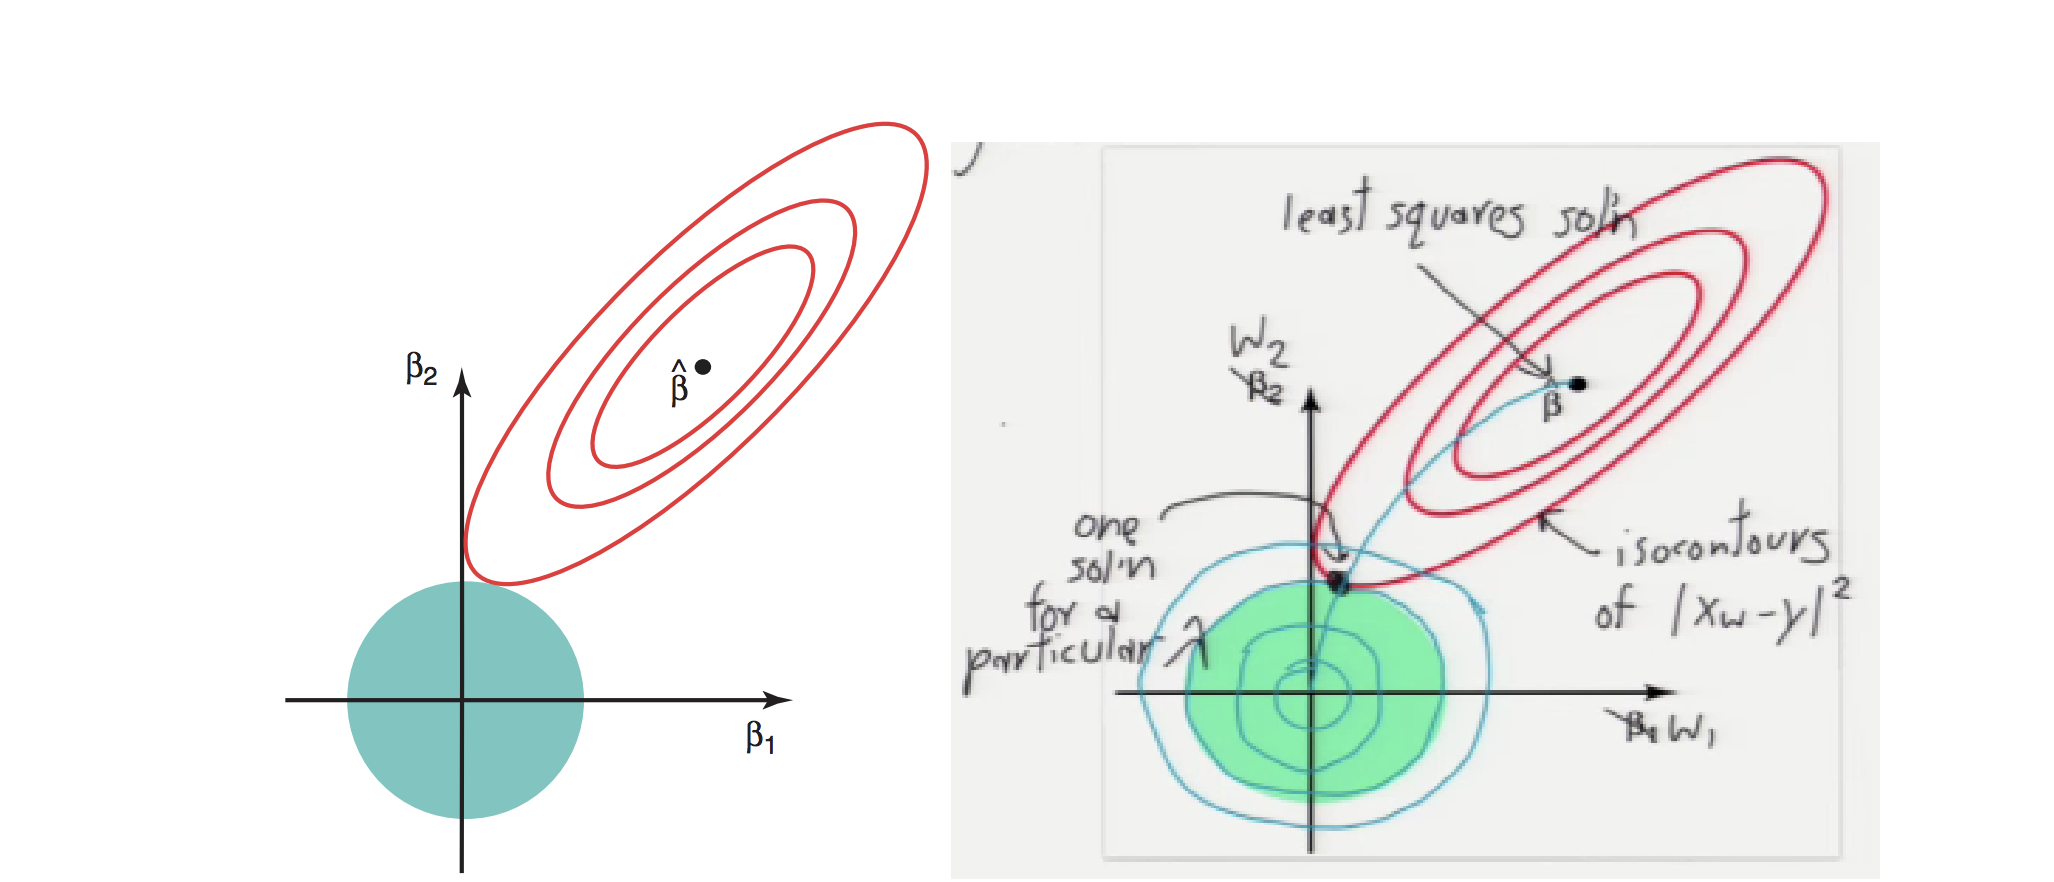

In [9]:
from IPython.display import Image
Image("/Users/hyunjaecho/Desktop/ridge.png")

In [10]:
alphas = [0.01, 0.1, 1, 10, 100, 1000]
best_alpha = 0
error = 10000
LASSO_coefficients = 0
for alpha in alphas:
    lasso_regression = Lasso(alpha=alpha)
    lasso_regression.fit(X_train, y_train)
    lasso_regression_predictions = lasso_regression.predict(X_test)
    mean_squared_error = mse(lasso_regression_predictions, y_test)
    
    if mean_squared_error < error:
        error = mean_squared_error
        LASSO_coefficients = lasso_regression.coef_
        
    best_alpha = alpha
    print("ALPHA: " + str(alpha))
    print(LASSO_coefficients)
    print()

print("mean_squared_error for LASSO regression: " + str(error))
print()
print("BEST ALPHA: " + str(best_alpha))

ALPHA: 0.01
[ 0.04400514  0.01851175  0.02491303 -0.08795208 -0.04244933  0.19632578
 -0.19180796  0.04060787  0.02709932  0.00932516 -0.02522417 -0.07498425
  0.20282011 -0.15942049  0.0310355   0.06784511 -0.20849525  0.19095906
 -0.14720253  0.14454901 -0.11751811  0.08755224  0.08453008 -0.08888179
 -0.00377078  0.03725228 -0.12181795  0.14723622 -0.15681456  0.13625985
 -0.16042959  0.23147503  0.00738399 -0.19894194  0.09976953  0.16522107
 -0.19009543 -0.20951056  0.33573276 -0.24293233  0.28110757 -0.24313481
  0.18869066 -0.16791432  0.21403368 -0.12209481 -0.04156291  0.00906873
  0.01964814 -0.04534878]

ALPHA: 0.1
[ 0.02189591  0.0175751   0.02548805 -0.03703111 -0.04264586  0.14569397
 -0.14158379  0.          0.0167337   0.00944409 -0.         -0.04898509
  0.15227315 -0.10935691  0.          0.04933959 -0.1584332   0.14052221
 -0.09721313  0.09439791 -0.06705568  0.03736829  0.08400495 -0.03851751
 -0.00289177  0.         -0.08525259  0.09719306 -0.10701035  0.08661278
 

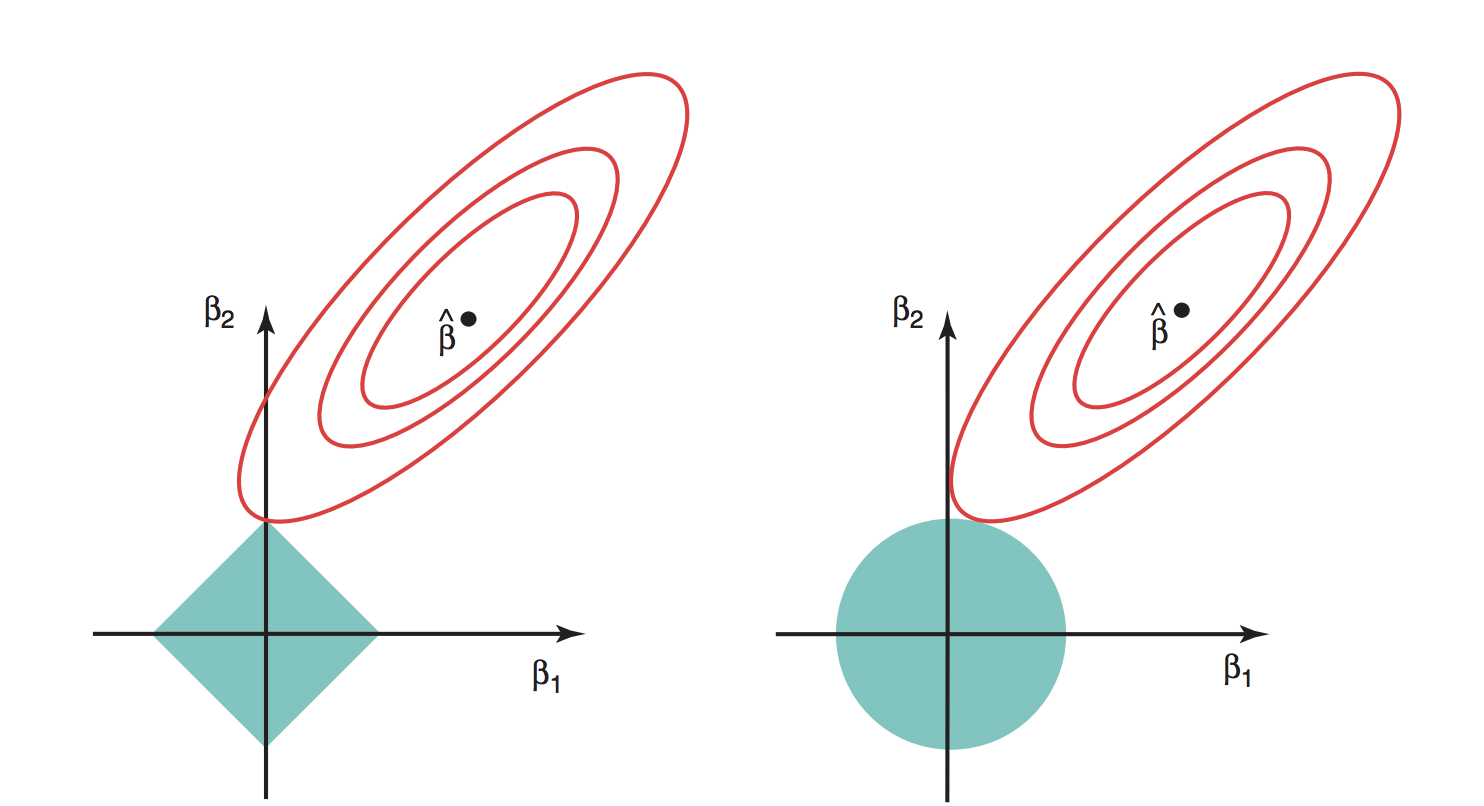

In [11]:
Image("/Users/hyunjaecho/Desktop/isocontours.png")

Image sources: Jonathan Shewchuk's notes
https://people.eecs.berkeley.edu/~jrs/papers/machlearn.pdf

What would happen if one of the columns is highly correlated with the label?

In [12]:
A.shape, label.shape

((200, 50), (200,))

In [13]:
new_column = label + 1.0

A_new = np.concatenate((A, new_column.reshape(-1,1)), axis=1)

In [14]:
A_new.shape

(200, 51)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(A_new, label, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

new_lasso_regression = Lasso(alpha=10)
new_lasso_regression.fit(X_train, y_train)
new_lasso_regression.coef_

array([-0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.95159476])